<br>

# Prediction of Wind Turbine Power Production 
***

## Author: Silvio Dunst

<br>

### Project Description
Develop a Python code to accurately predict the power production of a wind turbine based on wind speed values. The wind speed values are in the data set file "powerproduction.txt". Use the linear regression to predict the power output or power production. Explain simple linear regression.
***

<br>

### What is a Regression?
A regression searches for the relationship between variables. One of the most important fields in statistics and machine learning is the regression analysis. Generally, in regression analysis, you usually consider some phenomenon of interest and have a number of observations. Each observation has two or more features. Following the assumption that (at least) one of the features depends on the others, you try to establish a relation among them. There are many regression methods available like polynomial, ridge, lasso, elastic and linear regression. The linear regression is one of the most important and widely used regression techniques. It is a statistical approach for modelling the relationship between a dependent variable with a given set of independent variables. The simple linear regression is an approach for predicting a response using a single feature. The regression try to find a mathematical function/equation like `y=m*x+c` what maps the features or variables [1],[2]. 
***

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.set_option('display.max_rows',None)# show all the rows in the dataframe
df = pd.read_csv("powerproduction.txt")
df


,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


### Plotting the CSV file "powerproduction.txt" using the pandas dataframe

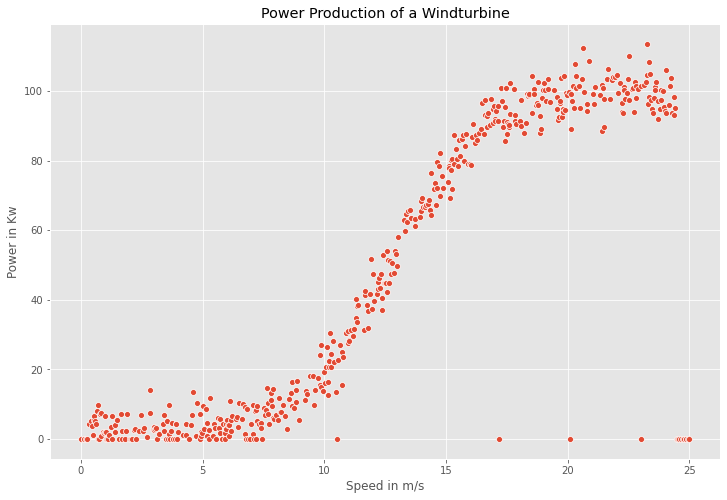

In [2]:
# Plot the CSV file "powerproduction.txt" using the pandas dataframe
plt.style.use('ggplot') # global parameters for pyplot for "ggplot" plot style
plt.rcParams['figure.figsize'] = 12, 8 # global parameters for pyplot increase the plot size
plt.title("Power Production of a Windturbine")
sns.scatterplot(x='speed',y='power',data=df)
plt.xlabel('Speed in m/s')
plt.ylabel('Power in Kw');

<br>

### Prediction for the power production with the linear regression based on the wind speed
Using scikit sklearn package to make the prediction for the power production output with the simple linear regression based on the mathematical equation `y=m*x+c`[3].


In [3]:
# Dividing dataset in two components in X for inputs in our case input speed column 0 
# Defining data to work with the inputs (regressors, X) and output (predictor, 𝑦)

X1 = df.iloc[:,0:1].values # X=input/regressor[:] all row values,0 is for values from column 0['speed'] and 1 for values from column 1['power']
y1 = df.iloc[:,1].values # y=output/predictor[:] all row values,1 is for values from column 1['power']

# Fitting the Linear Regression model from the scikit sklearn package to the dataset
linmodel1 = LinearRegression()# create a linear regression model
regfit1 = linmodel1.fit(X1,y1)# fit a regression line to the model
regcoef1 = linmodel1.coef_  # calculate the coefficient or slope(m)
regintercept1 = linmodel1.intercept_ # calculate the intercept or offset(c)
regscore1 = linmodel1.score(X1,y1) # calculates the score or 𝑅² number

print('Model 1')
print('Regression Coefficient/Slope:{}'.format(regcoef1))
print('Regression Intercept y axis or Offset:{}'.format(regintercept1))
print('Regression Score 𝑅²:{}'.format(regscore1))

# Different method to divide the dataset in two components in X for inputs in our case input speed column 0 
# try to fit a better model remove the first 5 and last 10 records from the dataset with the 0 values

listX = []
listX = df.iloc[5:490,0] #remove the first 5 and last 10 records from the dataset with the 0 values
X2 = np.array(listX).reshape(-1,1)
y2 = df.iloc[5:490,1].values # y=output/predictor[:] all row values,1 is for values from column 1['power']

# Fitting the Linear Regression model from the scikit sklearn package to the dataset
linmodel2 = LinearRegression()# create a linear regression model
regfit2 = linmodel2.fit(X2,y2)# fit a regression line to the model
regcoef2 = linmodel2.coef_ # calculate the coefficient or slope(m)
regintercept2 = linmodel2.intercept_ # calculate the intercept or offset(c)
regscore2 = linmodel2.score(X2,y2) # calculates the score or 𝑅² number


print('Model 2')
print('Regression Coefficient/Slope:{}'.format(regcoef2))
print('Regression Intercept y axis or Offset:{}'.format(regintercept2))
print('Regression Score 𝑅²:{}'.format(regscore2))

Model 1
Regression Coefficient/Slope:[4.91759567]
Regression Intercept y axis or Offset:-13.899902630519634
Regression Score 𝑅²:0.7289360258564073
Model 2
Regression Coefficient/Slope:[5.50789387]
Regression Intercept y axis or Offset:-19.17279283754413
Regression Score 𝑅²:0.8711036825756511


### Plotting Linear Regression

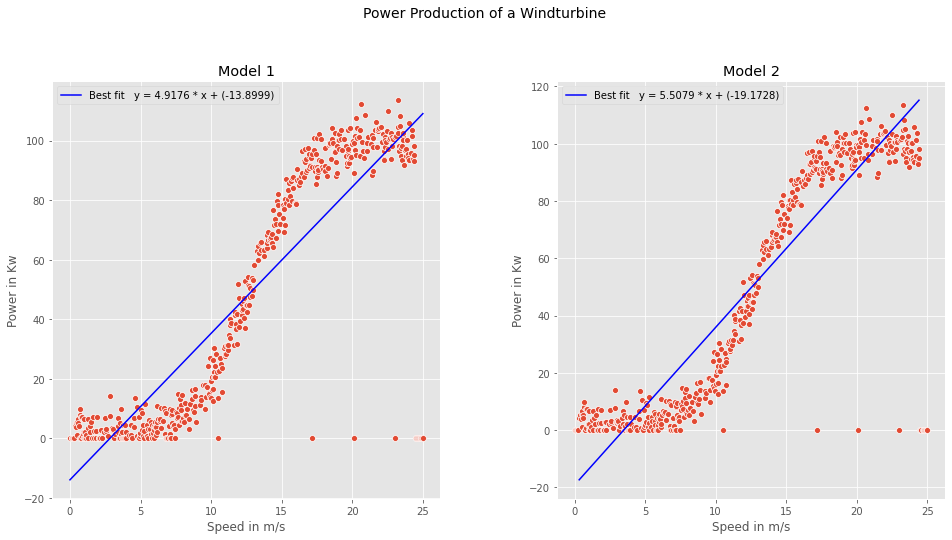

In [4]:
fig = plt.figure(figsize=(16,8))
title = fig.suptitle("Power Production of a Windturbine", fontsize = 14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax1 = fig.add_subplot(1,2,1)
plt.title("Model 1")
sns.scatterplot(x='speed',y='power',data=df)
plt.plot(X1,linmodel1.predict(X1),color='blue',label='Best fit   y = {} * x + ({})'.format(np.round(regcoef1[0],4),np.round(regintercept1,4)))
plt.legend()
plt.xlabel('Speed in m/s')
plt.ylabel('Power in Kw');

ax1 = fig.add_subplot(1,2,2)
plt.title("Model 2")
sns.scatterplot(x='speed',y='power',data=df)
plt.plot(X2,linmodel2.predict(X2),color='blue',label='Best fit   y = {} * x + ({})'.format(np.round(regcoef2[0],4),np.round(regintercept2,4)))
plt.legend()
plt.xlabel('Speed in m/s')
plt.ylabel('Power in Kw');

### Polynomial Regression

In [5]:
# Dividing dataset in two components in X for inputs in our case input speed column 0 
# Defining data to work with the inputs (regressors, X) and output (predictor, 𝑦)

X3 = df.iloc[:,0:1].values # X=input/regressor[:] all row values,0 is for values from column 0['speed'] and 1 for values from column 1['power']
y3 = df.iloc[:,1].values # y=output/predictor[:] all row values,1 is for values from column 1['power']

# Fitting the Polynomial Regression model from the scikit sklearn package to the dataset
polymodel1 = PolynomialFeatures(degree=4)
X_polymodel1 = polymodel1.fit_transform(X3)

polymodel1.fit(X_polymodel1,y3) # fit a regression line to the model
polymodel1lin = LinearRegression()# create a linear regression model
polymodel1lin.fit(X_polymodel1,y3)# fit a regression line to the model

regcoef3 = polymodel1lin.coef_ # calculate the coefficient or slope(m)
regintercept3 = polymodel1lin.intercept_ # calculate the intercept or offset(c)
regscore3 = polymodel1lin.score(X_polymodel1,y3) # calculates the score or 𝑅² number


print('Model 3')
print('Regression Coefficient/Slope:{}'.format(regcoef3))
print('Regression Intercept y axis or Offset:{}'.format(regintercept3))
print('Regression Score 𝑅²:{}'.format(regscore3))

# Different method to divide the dataset in two components in X for inputs in our case input speed column 0 
# try to fit a better model remove the first 5 and last 10 records from the dataset with the 0 values

listX = []
listX = df.iloc[5:490,0]#remove the first 5 and last 10 records from the dataset with the 0 values
X4 = np.array(listX).reshape(-1,1)
y4 = df.iloc[5:490,1].values # y=output/predictor[:] all row values,1 is for values from column 1['power']

# Fitting the Polynomial Regression model from the scikit sklearn package to the dataset
polymodel2 = PolynomialFeatures(degree=5)
X_polymodel2 = polymodel2.fit_transform(X4)

polymodel2.fit(X_polymodel2,y4)# fit a regression line to the model
polymodel2lin = LinearRegression()# create a linear regression model
polymodel2lin.fit(X_polymodel2,y4)# fit a regression line to the model

regcoef4 = polymodel2lin.coef_ # calculate the coefficient or slope(m)
regintercept4 = polymodel2lin.intercept_ # calculate the intercept or offset(c)
regscore4 = polymodel2lin.score(X_polymodel2,y4) # calculates the score or 𝑅² number


print('Model 4')
print('Regression Coefficient/Slope:{}'.format(regcoef4))
print('Regression Intercept y axis or Offset:{}'.format(regintercept4))
print('Regression Score 𝑅x2²:{}'.format(regscore4))

Model 3
Regression Coefficient/Slope:[ 0.         -0.16673107 -0.43377154  0.09319653 -0.0029185 ]
Regression Intercept y axis or Offset:3.893585441379493
Regression Score 𝑅²:0.8964014745348662
Model 4
Regression Coefficient/Slope:[ 0.00000000e+00  1.08722781e+01 -4.02512364e+00  5.32266587e-01
 -2.52802810e-02  4.00499459e-04]
Regression Intercept y axis or Offset:-3.838587740785748
Regression Score 𝑅x2²:0.9542543757061095


### Plotting Polynomial Regression

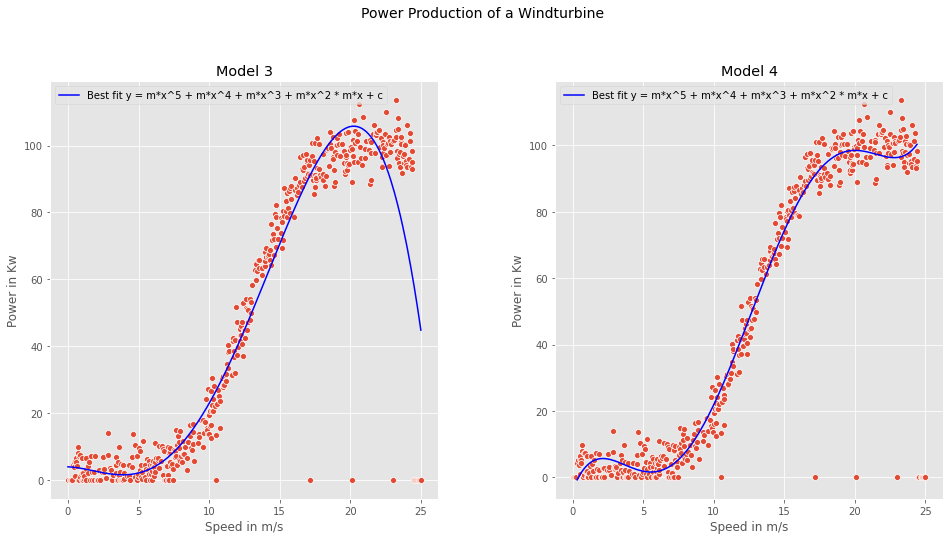

In [6]:
fig = plt.figure(figsize=(16,8))
title = fig.suptitle("Power Production of a Windturbine", fontsize = 14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax3 = fig.add_subplot(1,2,1)
plt.title("Model 3")
sns.scatterplot(x='speed',y='power',data=df)
plt.plot(X3,polymodel1lin.predict(polymodel1.fit_transform(X3)),color='blue',label='Best fit y = m*x^5 + m*x^4 + m*x^3 + m*x^2 * m*x + c')
plt.legend()
plt.xlabel('Speed in m/s')
plt.ylabel('Power in Kw');

ax4 = fig.add_subplot(1,2,2)
plt.title("Model 4")
sns.scatterplot(x='speed',y='power',data=df)
plt.plot(X4,polymodel2lin.predict(polymodel2.fit_transform(X4)),color='blue',label='Best fit y = m*x^5 + m*x^4 + m*x^3 + m*x^2 * m*x + c')
plt.legend()
plt.xlabel('Speed in m/s')
plt.ylabel('Power in Kw');

### Power production prediction for the Linear Regression  for Model 2

In [7]:
# Power production prediction for model 2 
y_predictmodel2 = linmodel2.predict(X2)
y_predictmodel2
print(len(y_predictmodel2))

485


### Power production prediction for the Polynomial Regression  for Model 4

In [8]:
# Power production prediction for model 4 
y_predictmodel4 = polymodel2lin.predict(X_polymodel2)
y_predictmodel4

array([ -0.71225992,  -0.1002743 ,   0.2863234 ,   0.6634668 ,
         0.84211796,   1.01673586,   1.18736541,   1.51683793,
         1.83089023,   1.98224365,   2.1298734 ,   2.27382281,
         2.55085277,   2.68401887,   2.81367569,   3.18201163,
         3.29805133,   3.41079064,   3.52027066,   3.62653229,
         3.72961622,   3.8295629 ,   3.92641256,   4.11098077,
         4.44469976,   4.52097902,   4.59447545,   4.86139583,
         4.92154848,   5.08887011,   5.18656698,   5.35378784,
         5.38993213,   5.42388267,   5.56194548,   5.6030221 ,
         5.62066391,   5.68123519,   5.693176  ,   5.69664224,
         5.69740445,   5.69019504,   5.6843679 ,   5.62020357,
         5.57068898,   5.50973317,   5.48744506,   5.36065787,
         5.21079539,   5.17834801,   5.04117711,   4.96851981,
         4.93126117,   4.89341557,   4.85500755,   4.77660154,
         4.65537777,   4.35893391,   4.31536711,   4.27156289,
         4.13716518,   4.09262299,   4.00317329,   3.95

### Calculate the Power production based on the User Wind Speed Input for the Linear Regression
The calculation for the wind speed power production is based on the linear function `y=m*x+c`.The power production = y, the coefficient or slope = m, the user input = x and the intercept or offset = c.


In [9]:
# Insert the wind speed 
windspeedlin = 0 #initialize the variable with 0
poweroutputlin = 0

# Error handling if user doesn't input a float number
try:
    windspeedinputlin = float(input('Insert the Wind speed from 0 to 25 m/s: '))
          
    if windspeedinputlin < 0:
        print('The wind speed is lower than 0 m/s')
    elif windspeedinputlin > 25:
        print('The wind speed is more than 25 m/s')
    elif windspeedinputlin >= 0 and windspeedinputlin <= 25:
        windspeedlin = windspeedinputlin
        #   y       =    m     *        x       +     c
        poweroutputlin = regcoef2 * windspeedlin + regintercept2
        poweroutputlin = poweroutputlin[0]# reads out the first array value
        poweroutputlin = np.round(poweroutputlin,2)# round the poweroutput to 2 decimal 


    if windspeedinputlin < 0:
        print('The power production for {} m/s of windspeed is {} kW'.format(windspeedlin,poweroutputlin))
    else:
        print('The power production for {} m/s of windspeed is {} kW'.format(windspeedinputlin,poweroutputlin))
except:
    print('You did not insert a float number. Please insert a float number:')


Insert the Wind speed from 0 to 25 m/s: 12.34
The power production for 12.34 m/s of windspeed is 48.79 kW


### Calculate the Power production based on the User Wind Speed Input for the Polynomial Regression
The calculation for the wind speed power production is based on the polynomial function with the order of 5. The power production = y, the coefficients 6 until 2 or slope = m, the user input = x and the intercept or offset = c. With the following formula. $$ y = m*x^5 + m*x^4 + m*x^3 + m*x^2 * m*x + c  $$ 


In [10]:
# Insert the wind speed 
windspeedpoly = 0 #initialize the variable with 0
poweroutputpoly = 0


# Error handling if user doesn't input a float number
try:
    windspeedinputpoly = float(input('Insert the Wind speed from 0 to 25 m/s: '))
          
    if windspeedinputpoly < 0:
        print('The wind speed is lower than 0 m/s')
    elif windspeedinputpoly > 25:
        print('The wind speed is more than 25 m/s')
    elif windspeedinputpoly >= 0 and windspeedinputpoly <= 25:
        windspeedpoly = windspeedinputpoly
        #   y       =    m     *        x       +     c
        poweroutputpoly = (regcoef4[5] * windspeedpoly**5) + (regcoef4[4] * windspeedpoly**4) + (regcoef4[3] * windspeedpoly**3) + (regcoef4[2] * windspeedpoly**2) + (regcoef4[1]* windspeedpoly) + regintercept4    
        poweroutputpoly = np.round(poweroutputpoly,2)# round the poweroutput to 2 decimal 


    if windspeedinputpoly < 0:
        print('The power production for {} m/s of windspeed is {} kW'.format(windspeedpoly,poweroutputpoly))
    else:
        print('The power production for {} m/s of windspeed is {} kW'.format(windspeedinputpoly,poweroutputpoly))
except:
    print('You did not insert a float number. Please insert a float number:')



Insert the Wind speed from 0 to 25 m/s: 12.34
The power production for 12.34 m/s of windspeed is 45.97 kW


### New Dataframe for the predictions

In [12]:
predicdf = df # copy the dataframe

# Insert values in the dataframe for the linear regression model 2
ypredictmodel2list = []
countmodel2 = -5
countindexmodel2 = 0

while countmodel2 < 485:
    if countmodel2 < 0:
        ypredictmodel2list.append(0)
    elif countmodel2 >= 0:
        ypredictmodel2list.append(y_predictmodel2[countindexmodel2])
        countindexmodel2 = countindexmodel2 + 1
    countmodel2 = countmodel2 + 1

# Insert values in the dataframe for the polynomial regression model 4
ypredictmodel4list = []
countmodel4 = -5
countindexmodel4 = 0

while countmodel4 < 485:
    if countmodel4 < 0:
        ypredictmodel4list.append(0)
    elif countmodel4 >= 0:
        ypredictmodel4list.append(y_predictmodel4[countindexmodel4])
        countindexmodel4 = countindexmodel4 + 1
    countmodel4 = countmodel4 + 1

columnlin = predicdf.loc[5:490,'Linear prediction model 2']= pd.Series(ypredictmodel2list)
columnpoly = predicdf.loc[5:490,'Polynomial prediction model 4']= pd.Series(ypredictmodel4list)

predicdf

,speed,power,Linear prediction model 2,Polynomial prediction model 4
0,0.000,0.000,NaN,NaN
1,0.125,0.000,NaN,NaN
2,0.150,0.000,NaN,NaN
3,0.225,0.000,NaN,NaN
4,0.275,0.000,NaN,NaN
5,0.325,4.331,-17.382727,-0.712260
6,0.400,5.186,-16.969635,-0.100274
7,0.450,3.826,-16.694241,0.286323
8,0.501,1.048,-16.413338,0.663467
9,0.526,5.553,-16.275641,0.842118


<br>

### Documentation

***

<br>

### Python Code Description for the Linear and Polynomial Regressions
In cell 5 different Python code packages and classes will be imported and used
```python
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
```
The text file "powerproduction.txt" in CSV format will be imported in a pandas dataframe and all rows of the dataframe df will be displayed.
```python
df = pd.set_option('display.max_rows',None)# show all the rows in the dataframe
df = pd.read_csv("powerproduction.txt")
df
```
In the next cell the pandas dataframe df will be plotted as a scatterplot 
```python
# Plot the CSV file "powerproduction.txt" using the pandas dataframe
plt.style.use('ggplot') # global parameters for pyplot for "ggplot" plot style
plt.rcParams['figure.figsize'] = 12, 8 # global parameters for pyplot increase the plot size
plt.title("Power Production of a Windturbine")
sns.scatterplot(x='speed',y='power',data=df)
plt.xlabel('Speed in m/s')
plt.ylabel('Power in Kw');
```
Cell 8
The next step after importing the packages and classes is to divide the dataset in two components X and y. For the input(regressor) X and for the output(predictor) y is used. The input(regressor) has to be converted into a two dimensional array. I using two methods to divide the dataframe dataset.
###### Method 1
Using the pandas iloc function to convert all the rows of the dataframe df into a two dimesional array. The input column 0 "speed" and the output column 1 "power" gives us the input(regressor) X1 as a two dimensional array. For the output (predictor) y1 all the rows of the dataframe df column 1 "power" are used as an array.
```python
# Dividing dataset in two components in X for inputs in our case input speed column 0 
# Defining data to work with the inputs (regressors, X) and output (predictor, 𝑦)

X1 = df.iloc[:,0:1].values # X=input/regressor[:] all row values,0 is for values from column 0['speed'] and 1 for values from column 1['power']
y1 = df.iloc[:,1].values # y=output/predictor[:] all row values,1 is for values from column 1['power']
```
###### Method 2
In this method I use the "numpy.array.reshape" function to create a two dimensional array for the input(regressor) X2. It converts the list "listX" from a one dimensional array into a two dimensional array with the method .reshape(-1,1) to have one column with many rows as necessary. The first number "-1" is used when the dimension is unknown and the second number "1" tells the amount of values or elements in the second array from the two dimesional array[4]. For the output (predictor) y2 the dataframe df column 1 "power" is used as an array. To fit a better regression line and get a better prediction result I remove the first 5 and the last 10 records from the dataframe df.
```python
# Different method to divide the dataset in two components in X for inputs in our case input speed column 0 
# try to fit a better model remove the first 5 and last 10 records from the dataset with the 0 values

listX = []
listX = df.iloc[5:490,0]#remove the first 5 and last 10 records from the dataset with the 0 values
X2 = np.array(listX).reshape(-1,1)
y2 = df.iloc[5:490,1].values # y=output/predictor[:] all row values,1 is for values from column 1['power']
```
The next step is to create a linear model with the scikit sklearn package using the "LinearRegression()" function. Fit the linear regression line to the model with ".fit(X,y)". Calculates the coefficient or slope(m)from the model. Next calculates the intercept or offset(c) from the model and than calculates the score or 𝑅² number. The closer the score or 𝑅² number goes to 1 the better the regression line fits to the model and the prediction result improves. The regression coefficient, intercept and score will be printed as an output.

```python
# Fitting the Linear Regression model from the scikit sklearn package to the dataset
linmodel1 = LinearRegression()# create a linear regression model
regfit1 = linmodel1.fit(X1,y1)# fit a regression line to the model
regcoef1 = linmodel1.coef_ # calculate the coefficient or slope(m)
regintercept1 = linmodel1.intercept_ # calculate the intercept or offset(c)
regscore1 = linmodel1.score(X1,y1) # calculates the score or 𝑅² number


print('Model 1')
print('Regression Coefficient/Slope:{}'.format(regcoef1))
print('Regression Intercept y axis or Offset:{}'.format(regintercept1))
print('Regression Score 𝑅²:{}'.format(regscore1))

# Fitting the Linear Regression model from the scikit sklearn package to the dataset
linmodel2 = LinearRegression()# create a linear regression model
regfit2 = linmodel2.fit(X2,y2)# fit a regression line to the model
regcoef2 = linmodel2.coef_ # calculate the coefficient or slope(m)
regintercept2 = linmodel2.intercept_ # calculate the intercept or offset(c)
regscore2 = linmodel2.score(X2,y2) # calculates the score or 𝑅² number


print('Model 2')
print('Regression Coefficient/Slope:{}'.format(regcoef2))
print('Regression Intercept y axis or Offset:{}'.format(regintercept2))
print('Regression Score 𝑅²:{}'.format(regscore2))
```
The same steps apply for the polynomial regression as well. The polynomial regression is special form of the linear regression. For the polynomial regression create a linear model and a polynomial model with the scikit sklearn package using the "LinearRegression()", the "PolynomialFeatures()" and the "PolynomialFeatures.fit_transform() function.

```python
# Fitting the Polynomial Regression model from the scikit sklearn package to the dataset
polymodel1 = PolynomialFeatures(degree=4)
X_polymodel1 = polymodel1.fit_transform(X3)

polymodel1.fit(X_polymodel1,y3) # fit a regression line to the model
polymodel1lin = LinearRegression()# create a linear regression model
polymodel1lin.fit(X_polymodel1,y3)# fit a regression line to the model

regcoef3 = polymodel1lin.coef_ # calculate the coefficient or slope(m)
regintercept3 = polymodel1lin.intercept_ # calculate the intercept or offset(c)
regscore3 = polymodel1lin.score(X_polymodel1,y3) # calculates the score or 𝑅² number
```

<br>

### Reference
***

[1] : https://realpython.com/linear-regression-in-python/

[2] : https://www.geeksforgeeks.org/linear-regression-python-implementation/?ref=lbp

[3] : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

[4] : https://www.w3schools.com/python/numpy_array_reshape.asp

[5] : https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/?ref=lbp


<br>

### End
***